In [5]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

In [82]:
import pandas as pd
coffee_price = pd.read_csv('//192.168.0.230/data/수원_기상자료/SUWON_S_DATA_TABLE.csv', encoding='utf-8')

In [83]:
coffee_price

,TA_YMD,HOUR,AGE,DAY,AMT,CNT,DONG,UNIT,TEMP,RAIN
0,20250628,7,6,6,140670,27,우만1동,5210,24.55,0.0
1,20250628,7,7,6,194075,11,우만1동,17643,24.55,0.0
2,20250628,7,3,6,61796,8,지동,7724,24.55,0.0
3,20250628,7,4,6,207738,17,지동,12220,24.55,0.0
4,20250628,7,5,6,101408,19,지동,5337,24.55,0.0
...,...,...,...,...,...,...,...,...,...,...
559480,20250622,6,3,7,58459,8,고등동,7307,17.80,0.0
559481,20250622,6,4,7,133882,28,고등동,4782,17.80,0.0
559482,20250622,6,5,7,89555,14,고등동,6397,17.80,0.0
559483,20250622,6,6,7,217200,22,고등동,9873,17.80,0.0


In [93]:
coffee_guide=pd.read_csv('//192.168.0.230/data/조성환/카드데이터/menu_sales_random_from_avg.csv', encoding='utf-8')

In [95]:
coffee_guide

,기준년월일,평균매출,아메리카노,라떼,카푸치노,총금액
0,2023-01-01,13724,4,1,0,11000
1,2023-01-02,10342,1,2,0,8000
2,2023-01-03,10420,1,0,2,8000
3,2023-01-04,10684,4,0,0,8000
4,2023-01-05,10930,2,2,0,10000
...,...,...,...,...,...,...
1030,2025-10-27,8141,2,0,1,7000
1031,2025-10-28,8940,2,1,0,7000
1032,2025-10-29,8704,2,0,1,7000
1033,2025-10-30,9079,1,2,0,8000


In [143]:
def time_slot(hour):
    if 0 <= hour <= 6: return "01"
    elif 7 <= hour <= 8: return "02"
    elif 9 <= hour <= 10: return "03"
    elif 11 <= hour <= 12: return "04"
    elif 13 <= hour <= 14: return "05"
    elif 15 <= hour <= 16: return "06"
    elif 17 <= hour <= 18: return "07"
    elif 19 <= hour <= 20: return "08"
    elif 21 <= hour <= 22: return "09"
    elif hour == 23: return "10"

In [144]:
df['TIME_SLOT'] = df['HOUR'].apply(time_slot)

In [145]:
def weather_type(row):
    if row['RAIN'] > 0:
        return 'rain'
    elif row['TEMP'] >= 25:
        return 'hot'
    elif row['TEMP'] <= 10:
        return 'cold'
    else:
        return 'normal'

df['WEATHER'] = df.apply(weather_type, axis=1)

In [146]:
import numpy as np

ratio_rule = {
    'rain':   (0.55, 0.70),
    'hot':    (0.35, 0.50),
    'cold':   (0.60, 0.75),
    'normal': (0.45, 0.60)
}

def coffee_ratio(weather):
    low, high = ratio_rule[weather]
    return np.random.uniform(low, high)

df['COFFEE_RATIO'] = df['WEATHER'].apply(coffee_ratio)
df['COFFEE_AMT'] = df['AMT'] * df['COFFEE_RATIO']


In [147]:
guide = coffee_guide.copy()

avg_price = (
    guide['총금액'] /
    (guide['아메리카노'] + guide['라떼'] + guide['카푸치노'])
).mean()


In [148]:
df['DRINK_CNT'] = (df['COFFEE_AMT'] / avg_price).round().astype(int)


C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current 

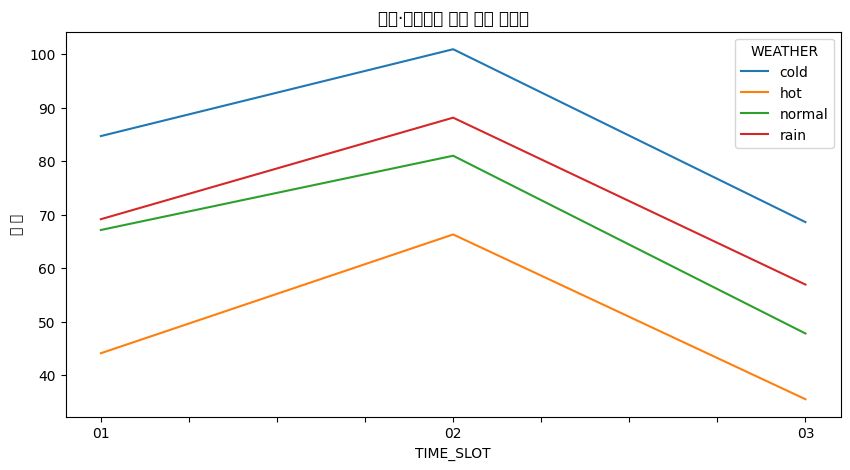

In [149]:
import matplotlib.pyplot as plt

summary = df.groupby(['WEATHER','TIME_SLOT'])['DRINK_CNT'].mean().unstack()

summary.T.plot(figsize=(10,5))
plt.title('날씨·시간대별 평균 음료 판매량')
plt.ylabel('잔 수')
plt.show()


In [150]:
df['WEEKDAY'] = pd.to_datetime(df['TA_YMD']).dt.weekday

X = df[['TEMP','RAIN','WEEKDAY']]
X = pd.concat([X, pd.get_dummies(df['TIME_SLOT'], prefix='TS')], axis=1)

y = df['DRINK_CNT']


In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.03242943610593296

In [152]:
future = pd.DataFrame({
    'TEMP':[28],
    'RAIN':[0],
    'WEEKDAY':[2],
    'TIME_SLOT':['07']  # 예: 퇴근시간
})

future_X = pd.concat([
    future[['TEMP','RAIN','WEEKDAY']],
    pd.get_dummies(future['TIME_SLOT'], prefix='TS')
], axis=1)

future_X = future_X.reindex(columns=X.columns, fill_value=0)

pred = model.predict(future_X)
print(f"예상 음료 판매량: {int(pred[0])}잔")


예상 음료 판매량: 32잔


In [153]:
import pandas as pd
import numpy as np

df = coffee_price.copy()
guide = coffee_guide.copy()

# 날짜
df["TA_YMD"] = pd.to_datetime(df["TA_YMD"], format="%Y%m%d")
df["WEEKDAY"] = df["TA_YMD"].dt.weekday  # 0=월

# 시간대 01~10 (네 기준)
def time_slot(hour):
    if 0 <= hour <= 6: return "01"
    elif 7 <= hour <= 8: return "02"
    elif 9 <= hour <= 10: return "03"
    elif 11 <= hour <= 12: return "04"
    elif 13 <= hour <= 14: return "05"
    elif 15 <= hour <= 16: return "06"
    elif 17 <= hour <= 18: return "07"
    elif 19 <= hour <= 20: return "08"
    elif 21 <= hour <= 22: return "09"
    elif hour == 23: return "10"
    return np.nan

df["TIME_SLOT"] = df["HOUR"].apply(time_slot)

# 날씨 타입
def weather_type(row):
    if row["RAIN"] > 0: return "rain"
    if row["TEMP"] >= 25: return "hot"
    if row["TEMP"] <= 10: return "cold"
    return "normal"

df["WEATHER"] = df.apply(weather_type, axis=1)

# 날씨별 음료 비율(중앙값 = 기대값)
ratio_rule = {
    "rain":   (0.55, 0.70),
    "hot":    (0.35, 0.50),
    "cold":   (0.60, 0.75),
    "normal": (0.45, 0.60),
}
df["COFFEE_RATIO"] = df["WEATHER"].map(lambda w: (ratio_rule[w][0] + ratio_rule[w][1]) / 2.0)
df["COFFEE_AMT"] = df["AMT"] * df["COFFEE_RATIO"]

# 평균 음료 가격(guide로 계산)
avg_price = (
    guide["총금액"] /
    (guide["아메리카노"] + guide["라떼"] + guide["카푸치노"])
).replace([np.inf, -np.inf], np.nan).dropna().mean()

df["DRINK_CNT"] = (df["COFFEE_AMT"] / avg_price).round().clip(lower=0).astype(int)


In [154]:
# 시계열 1시점 = (날짜, 시간대)
ts = (
    df.groupby(["TA_YMD", "TIME_SLOT"], as_index=False)
      .agg({
          "DRINK_CNT":"sum",
          "TEMP":"mean",
          "RAIN":"mean",
          "WEEKDAY":"first",
      })
      .sort_values(["TA_YMD", "TIME_SLOT"])
      .reset_index(drop=True)
)

# TIME_SLOT을 숫자 인덱스로(1~10)
ts["TS_IDX"] = ts["TIME_SLOT"].astype(int)  # "01"->1 ... "10"->10


In [157]:
import pandas as pd
import numpy as np

df = coffee_price.copy()
guide = coffee_guide.copy()

# 날짜 변환
df["TA_YMD"] = pd.to_datetime(df["TA_YMD"], format="%Y%m%d")
df["WEEKDAY"] = df["TA_YMD"].dt.weekday

# 시간대(네 기준)
def time_slot(hour):
    if 0 <= hour <= 6: return "01"
    elif 7 <= hour <= 8: return "02"
    elif 9 <= hour <= 10: return "03"
    elif 11 <= hour <= 12: return "04"
    elif 13 <= hour <= 14: return "05"
    elif 15 <= hour <= 16: return "06"
    elif 17 <= hour <= 18: return "07"
    elif 19 <= hour <= 20: return "08"
    elif 21 <= hour <= 22: return "09"
    elif hour == 23: return "10"
    return np.nan

df["TIME_SLOT"] = df["HOUR"].apply(time_slot)

# 날씨 타입
def weather_type(row):
    if row["RAIN"] > 0: return "rain"
    if row["TEMP"] >= 25: return "hot"
    if row["TEMP"] <= 10: return "cold"
    return "normal"

df["WEATHER"] = df.apply(weather_type, axis=1)

# 날씨별 음료 비율(중앙값)
ratio_rule = {
    "rain":   (0.55, 0.70),
    "hot":    (0.35, 0.50),
    "cold":   (0.60, 0.75),
    "normal": (0.45, 0.60),
}
df["COFFEE_RATIO"] = df["WEATHER"].map(lambda w: (ratio_rule[w][0] + ratio_rule[w][1]) / 2.0)
df["COFFEE_AMT"] = df["AMT"] * df["COFFEE_RATIO"]

# 평균 음료 가격 (guide 기반)
avg_price = (
    guide["총금액"] /
    (guide["아메리카노"] + guide["라떼"] + guide["카푸치노"])
).replace([np.inf, -np.inf], np.nan).dropna().mean()

df["DRINK_CNT"] = (df["COFFEE_AMT"] / avg_price).round().clip(lower=0).astype(int)


In [158]:
ts = (
    df.groupby(["TA_YMD", "TIME_SLOT"], as_index=False)
      .agg({
          "DRINK_CNT": "sum",
          "TEMP": "mean",
          "RAIN": "mean",
          "WEEKDAY": "first",
      })
      .sort_values(["TA_YMD", "TIME_SLOT"])
      .reset_index(drop=True)
)

ts["TS_IDX"] = ts["TIME_SLOT"].astype(int)  # 1~10


In [159]:
from sklearn.preprocessing import StandardScaler

num_cols = ["TEMP", "RAIN", "WEEKDAY"]
scaler = StandardScaler()
ts[num_cols] = scaler.fit_transform(ts[num_cols])

y = ts["DRINK_CNT"].values.astype(np.float32)
X_num = ts[num_cols].values.astype(np.float32)
X_slot = ts["TS_IDX"].values.astype(np.int32)  # 1~10

lookback = 28

def make_sequences(X_num, X_slot, y, lookback):
    Xn, Xs, Y = [], [], []
    for i in range(len(y) - lookback):
        Xn.append(X_num[i:i+lookback])        # (T, 3)
        Xs.append(X_slot[i:i+lookback])       # (T,)
        Y.append(y[i+lookback])               # 다음 시점
    return np.array(Xn), np.array(Xs), np.array(Y)

Xn, Xs, Y = make_sequences(X_num, X_slot, y, lookback)

# 시간 순서 유지한 split
split = int(len(Y) * 0.8)
Xn_train, Xn_val = Xn[:split], Xn[split:]
Xs_train, Xs_val = Xs[:split], Xs[split:]
Y_train, Y_val   = Y[:split],  Y[split:]


In [160]:
import tensorflow as tf
from tensorflow.keras import layers, models

# TIME_SLOT 임베딩을 위해 입력 1~10, (0은 패딩용)
slot_vocab = 11
slot_emb_dim = 4

inp_num  = layers.Input(shape=(lookback, 3), name="num_features")
inp_slot = layers.Input(shape=(lookback,), dtype="int32", name="time_slot")

emb = layers.Embedding(input_dim=slot_vocab, output_dim=slot_emb_dim, name="slot_emb")(inp_slot)
x = layers.Concatenate(axis=-1)([inp_num, emb])  # (B, T, 3+emb)

x = layers.LSTM(64, return_sequences=False)(x)
x = layers.Dense(64, activation="relu")(x)
out = layers.Dense(1)(x)

model = models.Model(inputs=[inp_num, inp_slot], outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.Huber(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_slot (InputLayer)         [(None, 28)]         0           []                               
                                                                                                  
 num_features (InputLayer)      [(None, 28, 3)]      0           []                               
                                                                                                  
 slot_emb (Embedding)           (None, 28, 4)        44          ['time_slot[0][0]']              
                                                                                                  
 concatenate (Concatenate)      (None, 28, 7)        0           ['num_features[0][0]',           
                                                                  'slot_emb[0][0]']           

In [161]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
]

history = model.fit(
    {"num_features": Xn_train, "time_slot": Xs_train},
    Y_train,
    validation_data=({"num_features": Xn_val, "time_slot": Xs_val}, Y_val),
    epochs=50,
    batch_size=256,
    shuffle=False,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
10/10 [==============================] - 2s 93ms/step - loss: 12980.9824 - mean_absolute_error: 12981.4824 - val_loss: 12462.3447 - val_mean_absolute_error: 12462.8447 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 0s 25ms/step - loss: 12980.0820 - mean_absolute_error: 12980.5820 - val_loss: 12461.6084 - val_mean_absolute_error: 12462.1084 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 0s 25ms/step - loss: 12977.9932 - mean_absolute_error: 12978.4932 - val_loss: 12459.8389 - val_mean_absolute_error: 12460.3389 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 0s 26ms/step - loss: 12975.0977 - mean_absolute_error: 12975.5986 - val_loss: 12458.1230 - val_mean_absolute_error: 12458.6230 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 0s 26ms/step - loss: 12971.6328 - mean_absolute_error: 12972.1328 - val_loss: 12455.1934 - val_mean_absolute_error: 12455.6934 - lr: 0.0010
Epoch 6/50
10/10 [======================

10/10 [==============================] - 0s 25ms/step - loss: 12064.0879 - mean_absolute_error: 12064.5879 - val_loss: 11521.7861 - val_mean_absolute_error: 11522.2861 - lr: 0.0010
Epoch 44/50
10/10 [==============================] - 0s 25ms/step - loss: 12022.0859 - mean_absolute_error: 12022.5869 - val_loss: 11479.2920 - val_mean_absolute_error: 11479.7920 - lr: 0.0010
Epoch 45/50
10/10 [==============================] - 0s 25ms/step - loss: 11979.2158 - mean_absolute_error: 11979.7168 - val_loss: 11435.9297 - val_mean_absolute_error: 11436.4297 - lr: 0.0010
Epoch 46/50
10/10 [==============================] - 0s 25ms/step - loss: 11935.4785 - mean_absolute_error: 11935.9785 - val_loss: 11391.6943 - val_mean_absolute_error: 11392.1943 - lr: 0.0010
Epoch 47/50
10/10 [==============================] - 0s 25ms/step - loss: 11890.8662 - mean_absolute_error: 11891.3662 - val_loss: 11346.5889 - val_mean_absolute_error: 11347.0889 - lr: 0.0010
Epoch 48/50
10/10 [============================

In [162]:
def predict_next(model, ts_df, next_temp, next_rain, next_weekday, next_ts_idx):
    # 다음 입력 1행 스케일링
    next_scaled = scaler.transform([[next_temp, next_rain, next_weekday]]).astype(np.float32)

    # 최근 lookback 시퀀스
    hist = ts_df.iloc[-lookback:].copy()
    X_num_seq = hist[num_cols].values.astype(np.float32)          # (T,3) 이미 스케일됨
    X_slot_seq = hist["TS_IDX"].values.astype(np.int32)           # (T,)

    # 모델 입력 (배치 차원 추가)
    pred = model.predict(
        {"num_features": X_num_seq[None, :, :], "time_slot": X_slot_seq[None, :]},
        verbose=0
    )[0,0]

    return max(0, int(round(float(pred))))

# 예시: 미래 17~18시대(07) 예보
pred_cnt = predict_next(model, ts, next_temp=28, next_rain=0, next_weekday=2, next_ts_idx=7)
print("예상 음료 판매량(잔):", pred_cnt)


C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


예상 음료 판매량(잔): 1257


In [163]:
import numpy as np
import pandas as pd
from datetime import datetime

def time_slot(hour):
    if 0 <= hour <= 6: return "01"
    elif 7 <= hour <= 8: return "02"
    elif 9 <= hour <= 10: return "03"
    elif 11 <= hour <= 12: return "04"
    elif 13 <= hour <= 14: return "05"
    elif 15 <= hour <= 16: return "06"
    elif 17 <= hour <= 18: return "07"
    elif 19 <= hour <= 20: return "08"
    elif 21 <= hour <= 22: return "09"
    elif hour == 23: return "10"
    return np.nan

def slot_to_idx(slot_str):  # "01"~"10" -> 1~10
    return int(slot_str)


In [164]:
def build_day_weather(forecast_df: pd.DataFrame, date_ymd: str):
    f = forecast_df.copy()

    # 날짜 컬럼 정리
    if "TA_YMD" in f.columns:
        # 문자열(YYYYMMDD) 또는 datetime 둘 다 처리
        if np.issubdtype(f["TA_YMD"].dtype, np.datetime64):
            f["DATE_YMD"] = f["TA_YMD"].dt.strftime("%Y%m%d")
        else:
            f["DATE_YMD"] = f["TA_YMD"].astype(str)
    else:
        raise ValueError("forecast_df에 TA_YMD 컬럼이 필요해요.")

    f = f[f["DATE_YMD"] == str(date_ymd)].copy()
    if f.empty:
        raise ValueError(f"{date_ymd} 날짜의 예보 데이터가 없어요.")

    # TIME_SLOT 만들기
    if "TIME_SLOT" not in f.columns:
        if "HOUR" not in f.columns:
            raise ValueError("TIME_SLOT 또는 HOUR 컬럼 중 하나는 필요해요.")
        f["TIME_SLOT"] = f["HOUR"].apply(time_slot)

    # 하루 10개 슬롯(01~10)로 정리(슬롯별 대표값: 평균)
    day = (
        f.groupby("TIME_SLOT", as_index=False)
         .agg({"TEMP":"mean", "RAIN":"mean"})
         .sort_values("TIME_SLOT")
         .reset_index(drop=True)
    )

    # 빠진 슬롯이 있으면(예보가 3시간 간격 등) 보간/채움
    all_slots = pd.DataFrame({"TIME_SLOT":[f"{i:02d}" for i in range(1,11)]})
    day = all_slots.merge(day, on="TIME_SLOT", how="left")
    day["TEMP"] = day["TEMP"].interpolate(limit_direction="both")
    day["RAIN"] = day["RAIN"].fillna(0.0)  # 강수는 없으면 0으로(보수적)

    # WEEKDAY 계산
    dt = pd.to_datetime(date_ymd, format="%Y%m%d")
    day["WEEKDAY"] = dt.weekday
    day["TS_IDX"] = day["TIME_SLOT"].apply(slot_to_idx)

    return day  # columns: TIME_SLOT, TEMP, RAIN, WEEKDAY, TS_IDX


In [165]:
def predict_day_rolling(model, ts_scaled: pd.DataFrame, day_weather: pd.DataFrame,
                        lookback: int, scaler, num_cols=("TEMP","RAIN","WEEKDAY")):
    """
    ts_scaled: 학습 때처럼 num_cols가 이미 scaler로 변환된 과거 시계열(ts)
               필수 컬럼: num_cols + ["TS_IDX"] + (있으면 "DRINK_CNT")
    day_weather: build_day_weather 결과 (스케일링 전 TEMP/RAIN/WEEKDAY/TS_IDX)
    """
    hist = ts_scaled.copy()

    preds = []
    for _, row in day_weather.iterrows():
        # 1) 모델 입력(최근 lookback)
        seq = hist.iloc[-lookback:]
        X_num_seq = seq[list(num_cols)].values.astype(np.float32)    # (T,3) 스케일된 상태
        X_slot_seq = seq["TS_IDX"].values.astype(np.int32)           # (T,)

        # 2) 예측
        yhat = model.predict(
            {"num_features": X_num_seq[None, :, :], "time_slot": X_slot_seq[None, :]},
            verbose=0
        )[0,0]
        yhat_int = max(0, int(round(float(yhat))))

        preds.append({
            "TIME_SLOT": row["TIME_SLOT"],
            "TS_IDX": int(row["TS_IDX"]),
            "TEMP": float(row["TEMP"]),
            "RAIN": float(row["RAIN"]),
            "WEEKDAY": int(row["WEEKDAY"]),
            "PRED_DRINK_CNT": yhat_int
        })

        # 3) 다음 스텝을 위해 history에 append (미래 입력날씨는 row 기반)
        next_scaled = scaler.transform([[row["TEMP"], row["RAIN"], row["WEEKDAY"]]]).astype(np.float32)[0]

        append_row = {c: next_scaled[i] for i, c in enumerate(num_cols)}
        append_row["TS_IDX"] = int(row["TS_IDX"])
        append_row["DRINK_CNT"] = yhat_int  # 기록용(모델 입력에는 안 쓰지만 관리 편함)

        hist = pd.concat([hist, pd.DataFrame([append_row])], ignore_index=True)

    return pd.DataFrame(preds)


In [166]:
# 예: future_forecast_df columns = ["TA_YMD","HOUR","TEMP","RAIN"]
day_weather = build_day_weather(future_forecast_df, "20251225")

pred_day = predict_day_rolling(
    model=model,
    ts_scaled=ts,          # 학습에 사용한 ts (num_cols 스케일된 상태)
    day_weather=day_weather,
    lookback=lookback,
    scaler=scaler,
    num_cols=("TEMP","RAIN","WEEKDAY")
)

pred_day


NameError: name 'future_forecast_df' is not defined

In [ ]:
total = int(pred_day["PRED_DRINK_CNT"].sum())
print("예상 하루 총 음료 판매량(잔):", total)

In [167]:
SLOT_REP_HOUR = {
    "01": 6,
    "02": 8,
    "03": 10,
    "04": 12,
    "05": 14,
    "06": 16,
    "07": 18,
    "08": 20,
    "09": 22,
    "10": 23,
}

def slot_to_fcst_time(slot: str) -> str:
    h = SLOT_REP_HOUR[slot]
    return f"{h:02d}00"

In [168]:
import math

def latlon_to_grid(lat: float, lon: float):
    RE = 6371.00877
    GRID = 5.0
    SLAT1 = 30.0
    SLAT2 = 60.0
    OLON = 126.0
    OLAT = 38.0
    XO = 43
    YO = 136

    DEGRAD = math.pi / 180.0

    re = RE / GRID
    slat1 = SLAT1 * DEGRAD
    slat2 = SLAT2 * DEGRAD
    olon = OLON * DEGRAD
    olat = OLAT * DEGRAD

    sn = math.tan(math.pi * 0.25 + slat2 * 0.5) / math.tan(math.pi * 0.25 + slat1 * 0.5)
    sn = math.log(math.cos(slat1) / math.cos(slat2)) / math.log(sn)

    sf = math.tan(math.pi * 0.25 + slat1 * 0.5)
    sf = (sf ** sn) * (math.cos(slat1) / sn)

    ro = math.tan(math.pi * 0.25 + olat * 0.5)
    ro = re * sf / (ro ** sn)

    ra = math.tan(math.pi * 0.25 + lat * DEGRAD * 0.5)
    ra = re * sf / (ra ** sn)

    theta = lon * DEGRAD - olon
    if theta > math.pi: theta -= 2.0 * math.pi
    if theta < -math.pi: theta += 2.0 * math.pi
    theta *= sn

    x = int(math.floor(ra * math.sin(theta) + XO + 0.5))
    y = int(math.floor(ro - ra * math.cos(theta) + YO + 0.5))
    return x, y


In [169]:
from datetime import datetime, timedelta

BASE_TIMES = ["0200","0500","0800","1100","1400","1700","2000","2300"]

def latest_base_datetime(now: datetime):
    hhmm = now.strftime("%H%M")
    candidates = []
    for bt in BASE_TIMES:
        bt_ready = datetime(now.year, now.month, now.day, int(bt[:2]), int(bt[2:])) + timedelta(minutes=10)
        if now >= bt_ready:
            candidates.append(bt)

    if candidates:
        return now.strftime("%Y%m%d"), candidates[-1]
    else:
        # 오늘 첫 발표(0200)도 아직 준비 전이면 전날 2300
        return (now - timedelta(days=1)).strftime("%Y%m%d"), "2300"


In [170]:
import requests
import pandas as pd

VILAGE_URL = "https://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst"

def fetch_vilage_fcst(service_key: str, base_date: str, base_time: str, nx: int, ny: int, num_rows: int = 2000):
    params = {
        "serviceKey": service_key,
        "pageNo": 1,
        "numOfRows": num_rows,
        "dataType": "JSON",
        "base_date": base_date,
        "base_time": base_time,
        "nx": nx,
        "ny": ny,
    }
    r = requests.get(VILAGE_URL, params=params, timeout=20)
    r.raise_for_status()
    data = r.json()
    items = data["response"]["body"]["items"]["item"]
    return pd.DataFrame(items)

def parse_pcp_to_mm(pcp):
    # PCP가 "강수없음", "1.0mm" 등 문자열로 올 수 있음
    if pcp is None or pcp == "":
        return None
    s = str(pcp).strip()
    if "없음" in s:
        return 0.0
    s = s.replace("mm", "").strip()
    return float(s)

def get_day_forecast_slots(service_key: str, date_ymd: str, lat: float, lon: float):
    nx, ny = latlon_to_grid(lat, lon)

    now = datetime.now()
    base_date, base_time = latest_base_datetime(now)

    df_fcst = fetch_vilage_fcst(service_key, base_date, base_time, nx, ny)

    # 우리가 필요한 10개 슬롯의 fcstTime
    slots = [f"{i:02d}" for i in range(1, 11)]
    want_times = {slot: slot_to_fcst_time(slot) for slot in slots}

    out_rows = []
    weekday = datetime.strptime(date_ymd, "%Y%m%d").weekday()

    for slot in slots:
        fcst_time = want_times[slot]

        sub = df_fcst[
            (df_fcst["fcstDate"] == date_ymd) &
            (df_fcst["fcstTime"] == fcst_time) &
            (df_fcst["category"].isin(["TMP", "PCP"]))
        ][["category","fcstValue"]]

        if sub.empty:
            # 예보가 없으면 일단 스킵(아래에서 보간/채움 처리)
            out_rows.append({"TA_YMD": date_ymd, "TIME_SLOT": slot, "TS_IDX": int(slot),
                             "TEMP": None, "RAIN": None, "WEEKDAY": weekday})
            continue

        d = sub.set_index("category")["fcstValue"].to_dict()
        temp = float(d["TMP"]) if "TMP" in d else None
        rain = parse_pcp_to_mm(d.get("PCP"))

        out_rows.append({"TA_YMD": date_ymd, "TIME_SLOT": slot, "TS_IDX": int(slot),
                         "TEMP": temp, "RAIN": rain, "WEEKDAY": weekday})

    day = pd.DataFrame(out_rows).sort_values("TIME_SLOT").reset_index(drop=True)

    # 결측 보정: TEMP는 보간, RAIN은 없으면 0
    day["TEMP"] = day["TEMP"].interpolate(limit_direction="both")
    day["RAIN"] = day["RAIN"].fillna(0.0)

    return day  # TIME_SLOT 10행


In [171]:
import numpy as np

def predict_day_rolling(model, ts_scaled: pd.DataFrame, day_weather: pd.DataFrame,
                        lookback: int, scaler, num_cols=("TEMP","RAIN","WEEKDAY")):
    hist = ts_scaled.copy()
    preds = []

    for _, row in day_weather.iterrows():
        # 최근 lookback 시퀀스
        seq = hist.iloc[-lookback:]
        X_num_seq = seq[list(num_cols)].values.astype(np.float32)
        X_slot_seq = seq["TS_IDX"].values.astype(np.int32)

        # 예측
        yhat = model.predict(
            {"num_features": X_num_seq[None, :, :], "time_slot": X_slot_seq[None, :]},
            verbose=0
        )[0, 0]
        yhat_int = max(0, int(round(float(yhat))))

        preds.append({
            "TIME_SLOT": row["TIME_SLOT"],
            "TEMP": float(row["TEMP"]),
            "RAIN": float(row["RAIN"]),
            "PRED_DRINK_CNT": yhat_int
        })

        # 다음 스텝을 위해 history에 append (입력날씨를 스케일링해서 붙임)
        next_scaled = scaler.transform([[row["TEMP"], row["RAIN"], row["WEEKDAY"]]]).astype(np.float32)[0]
        append_row = {c: next_scaled[i] for i, c in enumerate(num_cols)}
        append_row["TS_IDX"] = int(row["TS_IDX"])
        append_row["DRINK_CNT"] = yhat_int  # 기록용

        hist = pd.concat([hist, pd.DataFrame([append_row])], ignore_index=True)

    pred_df = pd.DataFrame(preds)
    pred_df["PRED_DAY_TOTAL"] = int(pred_df["PRED_DRINK_CNT"].sum())
    return pred_df


In [172]:
def predict_by_date(service_key: str, date_ymd: str, lat: float, lon: float,
                    model, ts_scaled, scaler, lookback):
    # 1) 기상청 예보로 하루 10개 슬롯 TEMP/RAIN 생성
    day_weather = get_day_forecast_slots(service_key, date_ymd, lat, lon)

    # 2) rolling 예측
    pred_day = predict_day_rolling(
        model=model,
        ts_scaled=ts_scaled,
        day_weather=day_weather,
        lookback=lookback,
        scaler=scaler,
        num_cols=("TEMP","RAIN","WEEKDAY")
    )
    return pred_day

# ===== 사용 예시 =====
SERVICE_KEY = "여기에_서비스키(Decoding)붙여넣기"

# 예: 서울시청 좌표
lat, lon = 37.5665, 126.9780

pred = predict_by_date(
    service_key=SERVICE_KEY,
    date_ymd="20251225",
    lat=lat, lon=lon,
    model=model,
    ts_scaled=ts,   # 학습 시 만든 ts (num_cols 스케일 적용된 상태)
    scaler=scaler,
    lookback=lookback
)

pred
print("하루 총 예측(잔):", int(pred["PRED_DAY_TOTAL"].iloc[0]))


HTTPError: 401 Client Error: Unauthorized for url: https://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst?serviceKey=%EC%97%AC%EA%B8%B0%EC%97%90_%EC%84%9C%EB%B9%84%EC%8A%A4%ED%82%A4%28Decoding%29%EB%B6%99%EC%97%AC%EB%84%A3%EA%B8%B0&pageNo=1&numOfRows=2000&dataType=JSON&base_date=20251223&base_time=1700&nx=60&ny=127